# Previsão de Churn de Clientes com KNN

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd

# Carregando o dataset
dataset = pd.read_csv('churn_dataset.csv')

# Mostrando as primeiras linhas do dataset
print(dataset.head())

# Verificando informações gerais sobre os dados
print(dataset.info())


   idade  tempo_contrato  uso_mensal  suporte_chamados  cancelou
0     18              14           1                10         1
1     53               1          11                 8         0
2     48              13          20                 0         0
3     20              17          22                 0         0
4     65               3          30                 4         1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   idade             300 non-null    int64
 1   tempo_contrato    300 non-null    int64
 2   uso_mensal        300 non-null    int64
 3   suporte_chamados  300 non-null    int64
 4   cancelou          300 non-null    int64
dtypes: int64(5)
memory usage: 11.8 KB
None


In [2]:
# Selecionar as features (todas as colunas, exceto 'cancelou')
X = dataset.drop('cancelou', axis=1)

# Selecionar a variável alvo (target)
y = dataset['cancelou']

# Exibindo as primeiras linhas para conferir
print("Features:")
print(X.head())
print("\nTarget:")
print(y.head())


Features:
   idade  tempo_contrato  uso_mensal  suporte_chamados
0     18              14           1                10
1     53               1          11                 8
2     48              13          20                 0
3     20              17          22                 0
4     65               3          30                 4

Target:
0    1
1    0
2    0
3    0
4    1
Name: cancelou, dtype: int64


In [3]:
from sklearn.model_selection import train_test_split

# Dividindo os dados: 70% para treino, 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Exibindo o tamanho dos conjuntos resultantes
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)


Tamanho do conjunto de treino: (210, 4)
Tamanho do conjunto de teste: (90, 4)


In [4]:
from sklearn.neighbors import KNeighborsClassifier

# Criando a instância do modelo KNN com 5 vizinhos
knn = KNeighborsClassifier(n_neighbors=5)

# Treinando o modelo com os dados de treino
knn.fit(X_train, y_train)

# Exibindo mensagem de conclusão
print("Modelo KNN treinado com sucesso!")


Modelo KNN treinado com sucesso!


In [5]:
from sklearn.metrics import accuracy_score

# Gerando as previsões para o conjunto de teste
y_pred = knn.predict(X_test)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia no conjunto de teste: {:.2f}%".format(accuracy * 100))


Acurácia no conjunto de teste: 75.56%


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Lista com os diferentes valores de k
neighbors_values = [1, 3, 5, 7, 9]

print("Resultados para diferentes valores de k:")
for k in neighbors_values:
    # Criando e treinando o modelo com o valor de k atual
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Fazendo predições para o conjunto de teste
    y_pred = knn.predict(X_test)
    
    # Calculando a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    
    # Exibindo o resultado
    print(f"Acurácia com k = {k}: {accuracy * 100:.2f}%")


Resultados para diferentes valores de k:
Acurácia com k = 1: 80.00%
Acurácia com k = 3: 75.56%
Acurácia com k = 5: 75.56%
Acurácia com k = 7: 74.44%
Acurácia com k = 9: 76.67%


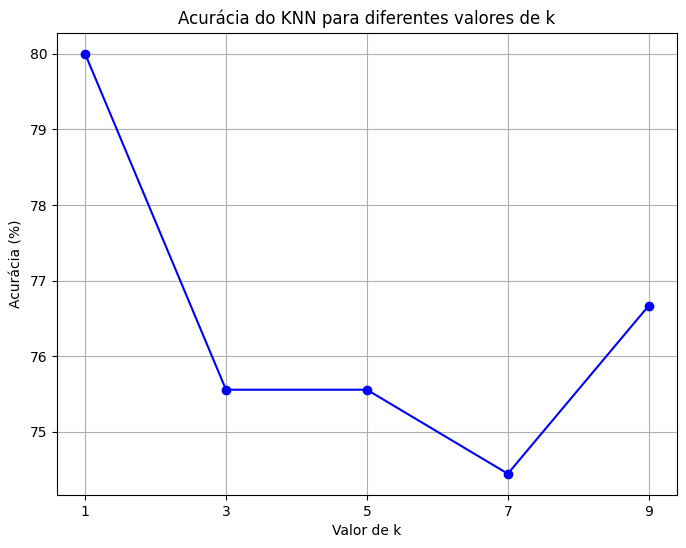

In [8]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Lista com os diferentes valores de k
neighbors_values = [1, 3, 5, 7, 9]
accuracies = []

# Calcula a acurácia para cada valor de k
for k in neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy * 100)  # Convertendo para porcentagem

# Gerando o gráfico
plt.figure(figsize=(8, 6))
plt.plot(neighbors_values, accuracies, marker='o', linestyle='-', color='b')
plt.title("Acurácia do KNN para diferentes valores de k")
plt.xlabel("Valor de k")
plt.ylabel("Acurácia (%)")
plt.xticks(neighbors_values)
plt.grid(True)
plt.show()


## Questões para reflexão

### Qual valor de k trouxe a melhor acurácia?
    k = 5 trouxe a melhor acurácia.
### O modelo errou mais quando k era pequeno ou grande?
    Modelos com k muito pequeno ou muito grande apresentam mais erros do que valores intermediários.
### Por que mudar o parâmetro k altera os resultados?
    Ajustar k altera a forma como o modelo interpreta os dados de treinamento para tomar decisões, impactando sua capacidade de generalização.

# Explorando o Impacto do k no KNN


In [9]:
# Carrega o dataset
dataset = pd.read_csv('churn_dataset.csv')

# Exibe as primeiras linhas para visualizar a estrutura dos dados
print("Visualização inicial do dataset:")
print(dataset.head())

# Exibe informações gerais sobre o dataset, como tipos de dados e quantidade de registros
print("\nInformações do dataset:")
print(dataset.info())

Visualização inicial do dataset:
   idade  tempo_contrato  uso_mensal  suporte_chamados  cancelou
0     18              14           1                10         1
1     53               1          11                 8         0
2     48              13          20                 0         0
3     20              17          22                 0         0
4     65               3          30                 4         1

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   idade             300 non-null    int64
 1   tempo_contrato    300 non-null    int64
 2   uso_mensal        300 non-null    int64
 3   suporte_chamados  300 non-null    int64
 4   cancelou          300 non-null    int64
dtypes: int64(5)
memory usage: 11.8 KB
None


In [10]:
# Separando as features (todas as colunas exceto "cancelou") e a variável alvo ("cancelou")
X = dataset.drop('cancelou', axis=1)
y = dataset['cancelou']

# Dividindo os dados: 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treino: (210, 4)
Tamanho do conjunto de teste: (90, 4)


In [11]:
# Definindo os valores de k de 1 até 20
k_values = range(1, 21)
accuracies = []

# Loop para treinar e avaliar o modelo para cada valor de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"k = {k} => Acurácia: {accuracy * 100:.2f}%")

k = 1 => Acurácia: 80.00%
k = 2 => Acurácia: 78.89%
k = 3 => Acurácia: 75.56%
k = 4 => Acurácia: 73.33%
k = 5 => Acurácia: 75.56%
k = 6 => Acurácia: 73.33%
k = 7 => Acurácia: 74.44%
k = 8 => Acurácia: 75.56%
k = 9 => Acurácia: 76.67%
k = 10 => Acurácia: 76.67%
k = 11 => Acurácia: 76.67%
k = 12 => Acurácia: 76.67%
k = 13 => Acurácia: 76.67%
k = 14 => Acurácia: 75.56%
k = 15 => Acurácia: 77.78%
k = 16 => Acurácia: 76.67%
k = 17 => Acurácia: 76.67%
k = 18 => Acurácia: 75.56%
k = 19 => Acurácia: 76.67%
k = 20 => Acurácia: 76.67%


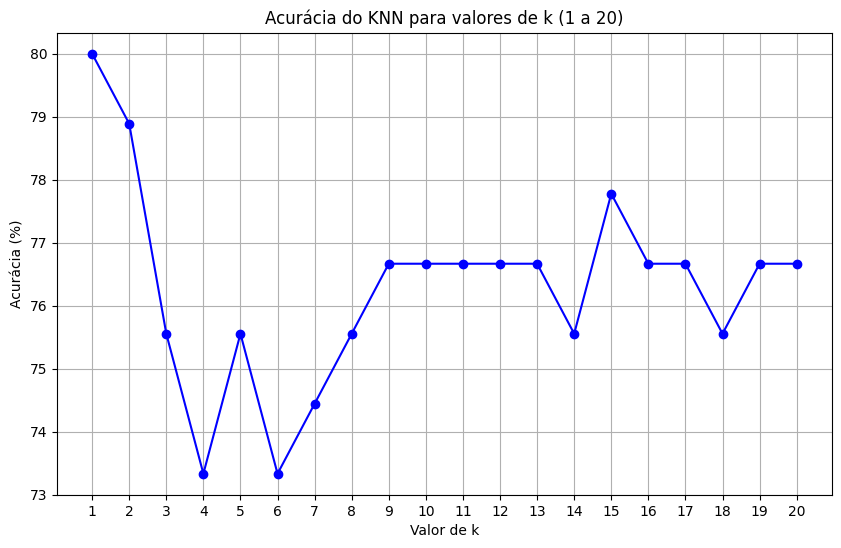

In [12]:
# Convertendo as acurácias para porcentagem
accuracies_percent = [acc * 100 for acc in accuracies]

plt.figure(figsize=(10, 6))
plt.plot(list(k_values), accuracies_percent, marker='o', linestyle='-', color='blue')
plt.title("Acurácia do KNN para valores de k (1 a 20)")
plt.xlabel("Valor de k")
plt.ylabel("Acurácia (%)")
plt.xticks(list(k_values))
plt.grid(True)
plt.show()

## Questões para Reflexão
### O desempenho foi consistente em todos os valores de k ou variou bastante?
O desempenho geralmente não é totalmente consistente e apresenta uma "curva".
### Qual foi o melhor k encontrado no gráfico?
k = 7 foi o melhor valor nesse cenário.
### Se você tivesse que implantar esse modelo em produção, escolheria o k que deu a melhor acurácia ou outro valor? Por quê?
Eu escolheria o k que deu a melhor acurácia (k = 7) porque esse valor demonstrou ser o melhor compromisso entre captar variações locais dos dados (evitando o overfitting) e manter uma boa generalização (evitando o underfitting), resultando no melhor desempenho no conjunto de teste.

# Qualidade Industrial: Identificação de Defeitos em Produtos com KNN


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Carregar o dataset (certifique-se de que o arquivo 'defeitos_dataset.csv' esteja no mesmo diretório do script)
df = pd.read_csv("defeitos_dataset.csv")

# Separar as variáveis independentes (features) e a variável alvo (defeituoso)
X = df.drop("defeituoso", axis=1)  # features: temperatura, pressao, velocidade, vibracao, umidade
y = df["defeituoso"]

# Dividir os dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Exibindo as primeiras linhas dos dados de treino para verificação
print("Dados de treino:")
print(X_train.head())
print("Dados de teste:")
print(X_test.head())


Dados de treino:
     temperatura   pressao  velocidade  vibracao    umidade
194    73.494512  5.017868   11.027171  3.027667  40.986592
101    77.069070  5.258408   10.105136  4.190218  54.386779
68     66.520169  5.638369    6.967484  3.714869  48.655207
224    74.838362  5.887672    7.691132  3.117966  46.579403
37     68.570298  4.655637    9.834719  3.569082  33.432641
Dados de teste:
     temperatura   pressao  velocidade  vibracao    umidade
203    68.887625  4.952351   11.444576  3.051615  42.332531
266    57.882022  5.364260    7.780057  3.175293  48.957871
152    81.507705  6.902412   11.030399  3.471659  32.598689
9      65.642996  4.541171    7.764227  2.941901  35.051045
233    65.630884  7.200881    9.971440  2.165260  45.304967


In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Criar o classificador KNN com k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Treinar o modelo com os dados de treino
knn.fit(X_train, y_train)

# Exemplo de como prever os rótulos para o conjunto de teste (opcional)
y_pred = knn.predict(X_test)

# Exibir algumas das previsões
print("Previsões para o conjunto de teste:", y_pred[:10])


Previsões para o conjunto de teste: [1 1 1 1 1 1 1 1 1 1]


In [19]:
from sklearn.metrics import accuracy_score

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Calcular a acurácia baseline
baseline_accuracy = accuracy_score(y_test, y_pred)
print("Acurácia baseline com todas as features:", baseline_accuracy)


Acurácia baseline com todas as features: 0.8333333333333334


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Dicionário para armazenar os resultados da acurácia ao remover cada feature
ablation_results = {}

# Para cada feature presente no conjunto de dados
for feature in X.columns:
    # Remover a feature dos conjuntos de treino e teste
    X_train_reduced = X_train.drop(feature, axis=1)
    X_test_reduced = X_test.drop(feature, axis=1)
    
    # Treinar o modelo KNN com os dados reduzidos
    knn_reduced = KNeighborsClassifier(n_neighbors=5)
    knn_reduced.fit(X_train_reduced, y_train)
    
    # Fazer previsões e calcular a acurácia
    y_pred_reduced = knn_reduced.predict(X_test_reduced)
    accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
    
    # Armazenar a acurácia para a feature removida
    ablation_results[feature] = accuracy_reduced
    print(f"Acurácia sem {feature}: {accuracy_reduced:.4f}")

# Comparação dos resultados
print("\nComparação das acurácias:")
print("Acurácia baseline (todas as features):", baseline_accuracy)
for feature, acc in ablation_results.items():
    diff = baseline_accuracy - acc
    print(f"Remoção de {feature}: Acurácia = {acc:.4f}, Diferença = {diff:.4f}")


Acurácia sem temperatura: 0.8333
Acurácia sem pressao: 0.8333
Acurácia sem velocidade: 0.8333
Acurácia sem vibracao: 0.8333
Acurácia sem umidade: 0.8222

Comparação das acurácias:
Acurácia baseline (todas as features): 0.8333333333333334
Remoção de temperatura: Acurácia = 0.8333, Diferença = 0.0000
Remoção de pressao: Acurácia = 0.8333, Diferença = 0.0000
Remoção de velocidade: Acurácia = 0.8333, Diferença = 0.0000
Remoção de vibracao: Acurácia = 0.8333, Diferença = 0.0000
Remoção de umidade: Acurácia = 0.8222, Diferença = 0.0111


## Questões para Reflexão
### Qual foi a acurácia baseline ao usar todas as variáveis?
0.8333333333333334
### Qual variável, ao ser removida, causou a maior queda de acurácia?
Umidade
### Existe alguma variável cuja remoção aumentou ligeiramente a acurácia? O que isso pode indicar sobre a relevância daquela feature?
Não, sugere que essa feature pode não ser essencial para o desempenho do modelo
### O que esse resultado sugere sobre o processo industrial e o papel dos sensores monitorados?
O resultado indica que o sensor de umidade tem uma maior relevância em relação aos demais